In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

In [8]:
cc = pd.read_csv('cc_info.csv')
cc.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [9]:
transaction = pd.read_csv('transactions.csv', parse_dates = ['date'])
transaction.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [30]:
cc.isnull().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [32]:
transaction.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

# Q1 
Your boss wants to identify those users that in your dataset never went above the
monthly credit card limit (calendar month). The goal of this is to automatically increase
their limit. Can you send him the list of Ids?

In [39]:
credit_limit = transaction.groupby([transaction['date'].dt.month, 'credit_card'])['transaction_dollar_amount'].sum().unstack(fill_value=0).T.reset_index()

In [43]:
credit_limit = credit_limit.merge(cc, how = 'left', on = 'credit_card')

In [44]:
credit_limit

,credit_card,7,8,9,10,city,state,zipcode,credit_card_limit
0,1003715054175576,162.56,8441.51,11281.56,8954.21,Houston,PA,15342,20000
1,1013870087888817,281.43,11981.15,12461.96,12090.34,Washington,NH,3280,15000
2,1023820165155391,943.26,22741.20,18108.12,19259.98,Charlotte,VT,5445,28000
3,1073931538936472,220.07,2991.05,2557.12,1638.03,Dallas,PA,18612,10000
4,1077622576192810,0.00,634.61,551.28,604.84,Houston,PA,15342,10000
...,...,...,...,...,...,...,...,...,...
979,9958678964376192,59.22,5960.35,5829.17,5623.22,Washington,NH,3280,10000
980,9961694231875562,484.06,4385.64,4259.73,5442.72,Washington,NH,3280,10000
981,9981251982982618,338.12,13848.80,11862.07,12959.72,New York,NY,10001,18000
982,9986135779184360,293.42,10958.65,11468.31,11796.95,Houston,PA,15342,14000


In [53]:
credit_limit[ (credit_limit[7] <= credit_limit['credit_card_limit'])
            & (credit_limit[8] <= credit_limit['credit_card_limit'])
            & (credit_limit[9] <= credit_limit['credit_card_limit'])
            & (credit_limit[10] <= credit_limit['credit_card_limit'])]['credit_card']

0      1003715054175576
1      1013870087888817
2      1023820165155391
3      1073931538936472
4      1077622576192810
             ...       
978    9946917923319410
979    9958678964376192
980    9961694231875562
981    9981251982982618
982    9986135779184360
Name: credit_card, Length: 862, dtype: int64

# Q2
On the other hand, she wants you to implement an algorithm that as soon as a user goes
above her monthly limit, it triggers an alert so that the user can be notified about that.We
assume here that at the beginning of the new month, user total money spent gets reset
to zero (i.e. she pays the card fully at the end of each month). Build a function that for
each day, returns a list of users who went above their credit card monthly limit on that
day

In [128]:
for month in np.sort(transaction['date'].dt.month.unique()):
    print('for month ' + str(month))
    month_df = transaction[transaction['date'].dt.month == month]
    day_df = month_df.groupby([month_df['date'].dt.day, 'credit_card'])['transaction_dollar_amount'].sum().unstack(fill_value=0).T.reset_index()
    day_df = day_df.merge(cc, how = 'left', on = 'credit_card')
    for day in np.sort(month_df['date'].dt.day.unique()):
        print('for day ' + str(day))
        if month == 7:
            day_list = [31]
        else:
            day_list = list(range(1, day+1))
        print(day_df[day_df['credit_card_limit'] < day_df.loc[:,day_list].sum(axis=1)]['credit_card'])

for month 7
for day 31
Series([], Name: credit_card, dtype: int64)
for month 8
for day 1
Series([], Name: credit_card, dtype: int64)
for day 2
Series([], Name: credit_card, dtype: int64)
for day 3
Series([], Name: credit_card, dtype: int64)
for day 4
Series([], Name: credit_card, dtype: int64)
for day 5
Series([], Name: credit_card, dtype: int64)
for day 6
Series([], Name: credit_card, dtype: int64)
for day 7
Series([], Name: credit_card, dtype: int64)
for day 8
Series([], Name: credit_card, dtype: int64)
for day 9
Series([], Name: credit_card, dtype: int64)
for day 10
Series([], Name: credit_card, dtype: int64)
for day 11
Series([], Name: credit_card, dtype: int64)
for day 12
Series([], Name: credit_card, dtype: int64)
for day 13
384    4462290711836916
836    8522875529951473
Name: credit_card, dtype: int64
for day 14
384    4462290711836916
836    8522875529951473
Name: credit_card, dtype: int64
for day 15
384    4462290711836916
836    8522875529951473
Name: credit_card, dtype: int

Series([], Name: credit_card, dtype: int64)
for day 2
Series([], Name: credit_card, dtype: int64)
for day 3
Series([], Name: credit_card, dtype: int64)
for day 4
Series([], Name: credit_card, dtype: int64)
for day 5
Series([], Name: credit_card, dtype: int64)
for day 6
Series([], Name: credit_card, dtype: int64)
for day 7
Series([], Name: credit_card, dtype: int64)
for day 8
Series([], Name: credit_card, dtype: int64)
for day 9
Series([], Name: credit_card, dtype: int64)
for day 10
Series([], Name: credit_card, dtype: int64)
for day 11
Series([], Name: credit_card, dtype: int64)
for day 12
Series([], Name: credit_card, dtype: int64)
for day 13
241    3281814060807145
Name: credit_card, dtype: int64
for day 14
241    3281814060807145
Name: credit_card, dtype: int64
for day 15
241    3281814060807145
663    6984795534098127
Name: credit_card, dtype: int64
for day 16
168    2505223645294729
241    3281814060807145
579    6174559182308122
641    6766253113444560
663    6984795534098127
Nam

Alternative solution:
     REF: https://github.com/JifuZhao/DS-Take-Home/blob/master/10.%20Credit%20Card%20Transactions.ipynb

In [138]:
data = transaction
data['month'] = data['date'].apply(lambda x: x.month)
data['day'] = data['date'].apply(lambda x: x.day)
data['weekday'] = data['date'].apply(lambda x: x.dayofweek)
data['hour'] = data['date'].apply(lambda x: x.hour)

# drop useless features
data = data.drop(labels='date', axis=1)
data = pd.merge(left=transaction, right=cc, on='credit_card', how='left')
data.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,month,day,weekday,hour,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,9,11,4,0,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,10,24,5,22,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,10,26,0,18,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,10,22,3,19,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,10,26,0,20,Houston,PA,15342,20000


In [153]:
def alert(data, month, day):
    """ function to return the list of credit cards that exceed the limit """
    data = data[(data['month'] == month) & (data['day'] <= day)]
    limit = data.groupby('credit_card')['credit_card_limit'].min().reset_index()
    transaction = data.groupby('credit_card')['transaction_dollar_amount'].sum().reset_index()
    
    merged = pd.merge(left=transaction, right=limit, on='credit_card', how='left')
    result = merged[merged['transaction_dollar_amount'] > merged['credit_card_limit']]
    
    return result

In [154]:
alert(data, month=8, day=20)

,credit_card,transaction_dollar_amount,credit_card_limit
194,2850146878241916,4012.81,4000
319,3936887050542904,5352.07,4000
341,4118286032166087,3416.52,3000
383,4462290711836916,3119.53,2000
525,5723635641134781,2161.30,2000
698,7299183791723634,7074.49,7000
772,7850942767136368,5704.00,4000
834,8522875529951473,5860.89,5000
874,8972201384562696,5266.08,5000


# Q3 
Finally, your boss is very concerned about frauds cause they are a huge cost for credit
card companies. She wants you to implement an unsupervised algorithm that returns all
transactions that seem unusual and are worth being investigated further.

In [165]:
address = data.groupby('credit_card')['Long', 'Lat'].mean().reset_index()
address = address.rename(columns={'Long': 'Long_median', 'Lat': 'Lat_median'})
data = pd.merge(left=data, right=address, on='credit_card', how='left')

In [166]:
data['distance'] = np.sqrt((data['Long'] - data['Long_median'])**2 + (data['Lat'] - data['Lat_median'])**2)

In [168]:
median = data.groupby('credit_card')['transaction_dollar_amount'].median().reset_index()
median = median.rename(columns={'transaction_dollar_amount': 'transaction_median'})
data = pd.merge(left=data, right=median, on='credit_card', how='left')

In [170]:
data['transaction_to_median'] = data['transaction_dollar_amount'] / data['transaction_median']
data['transaction_to_limit'] = data['transaction_dollar_amount'] / data['credit_card_limit']

data.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,month,day,weekday,hour,city,...,Long_median_x,Lat_median_x,Long_median_y,Lat_median_y,Long_median,Lat_median,distance,transaction_median,transaction_to_median,transaction_to_limit
0,1003715054175576,2015-08-14 21:34:39,98.00,-80.244063,40.249143,8,14,4,21,Houston,...,-80.218415,40.237883,-80.218415,40.237883,-80.218415,40.237883,0.028011,86.975,1.126761,0.004900
1,1003715054175576,2015-08-07 17:42:28,53.80,-80.249517,40.218156,8,7,4,17,Houston,...,-80.218415,40.237883,-80.218415,40.237883,-80.218415,40.237883,0.036831,86.975,0.618569,0.002690
2,1003715054175576,2015-08-24 19:29:27,101.17,-80.278162,40.263657,8,24,0,19,Houston,...,-80.218415,40.237883,-80.218415,40.237883,-80.218415,40.237883,0.065070,86.975,1.163208,0.005059
3,1003715054175576,2015-08-10 20:24:04,92.21,-80.152161,40.256544,8,10,0,20,Houston,...,-80.218415,40.237883,-80.218415,40.237883,-80.218415,40.237883,0.068832,86.975,1.060190,0.004611
4,1003715054175576,2015-08-03 18:51:08,54.87,-80.184581,40.199999,8,3,0,18,Houston,...,-80.218415,40.237883,-80.218415,40.237883,-80.218415,40.237883,0.050793,86.975,0.630871,0.002743


In [171]:
# drop useless features
labels = ['transaction_dollar_amount', 'Long', 'Lat', 'city', 'state', 'zipcode', 'credit_card_limit', 
          'month', 'day', 'Long_median', 'Lat_median', 'transaction_median']
data = data.drop(labels=labels, axis=1)
data.head()

,credit_card,date,weekday,hour,Long_median_x,Lat_median_x,Long_median_y,Lat_median_y,distance,transaction_to_median,transaction_to_limit
0,1003715054175576,2015-08-14 21:34:39,4,21,-80.218415,40.237883,-80.218415,40.237883,0.028011,1.126761,0.004900
1,1003715054175576,2015-08-07 17:42:28,4,17,-80.218415,40.237883,-80.218415,40.237883,0.036831,0.618569,0.002690
2,1003715054175576,2015-08-24 19:29:27,0,19,-80.218415,40.237883,-80.218415,40.237883,0.065070,1.163208,0.005059
3,1003715054175576,2015-08-10 20:24:04,0,20,-80.218415,40.237883,-80.218415,40.237883,0.068832,1.060190,0.004611
4,1003715054175576,2015-08-03 18:51:08,0,18,-80.218415,40.237883,-80.218415,40.237883,0.050793,0.630871,0.002743


In [172]:
x = data[['weekday', 'hour', 'distance', 'transaction_to_median', 'transaction_to_limit']]
scaler = StandardScaler()
norm_x = scaler.fit_transform(x)

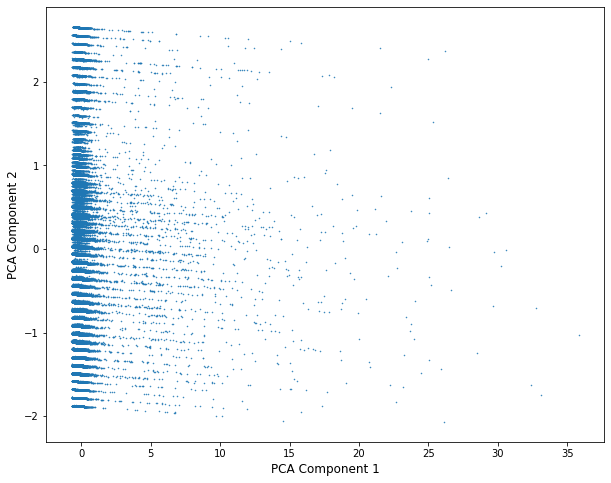

In [175]:
pca = PCA(n_components=2, random_state=42)
pca_x = pca.fit_transform(norm_x)

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(pca_x[:, 0], pca_x[:, 1], '.', markersize=1)
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
plt.show()

In [176]:
forest = IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, 
                         max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42)
forest = forest.fit(norm_x)
score = forest.decision_function(norm_x)
label = forest.predict(norm_x)

In [178]:
inlier = pca_x[label == 1]
outlier = pca_x[label == -1]

In [184]:
xmin = pca_x[:, 0].min() - 1
xmax = pca_x[:, 0].max() + 1
ymin = pca_x[:, 1].min() - 1
ymax = pca_x[:, 1].max() + 1

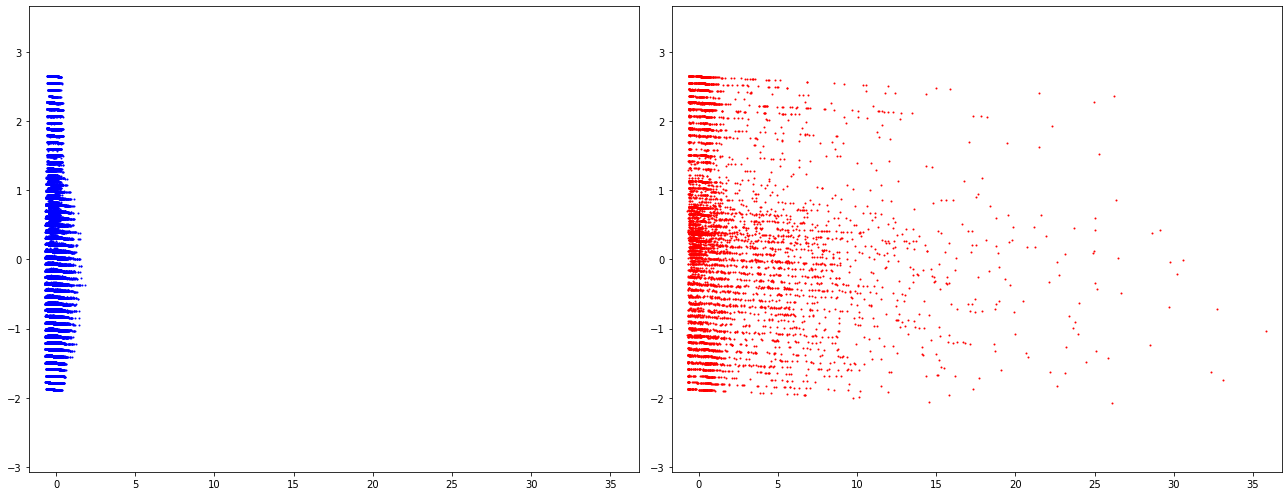

In [187]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
ax[0].plot(inlier[:, 0], inlier[:, 1], 'b.', markersize=2, label='Inlier')
ax[0].set_xlim([xmin, xmax])
ax[0].set_ylim([ymin, ymax])
ax[1].plot(outlier[:, 0], outlier[:, 1], 'r.', markersize=2, label='Outlier')
ax[1].set_xlim([xmin, xmax])
ax[1].set_ylim([ymin, ymax])
plt.tight_layout()
plt.show()